In [1]:
import numpy as np
import pylab as pl 
import time
from IPython.display import display, clear_output
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(777)

In [3]:
array1 = np.random.randn(2,100)
array2 = np.random.randn(2,100)

#adding some noise 
array1 = array1 + 2

In [4]:
array2.shape

(2, 100)

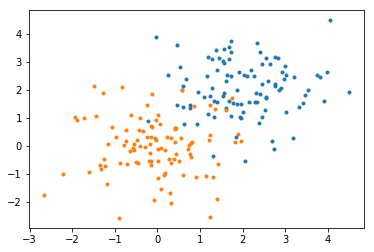

In [5]:
pl.plot(array1[0], array1[1], ".")
pl.plot(array2[0], array2[1], ".")

In [6]:
random_stack = np.hstack([array1, array2])

In [7]:
centers = np.array([[0.,-1.], [0,-2]]) 

Text(0,0.5,'y')

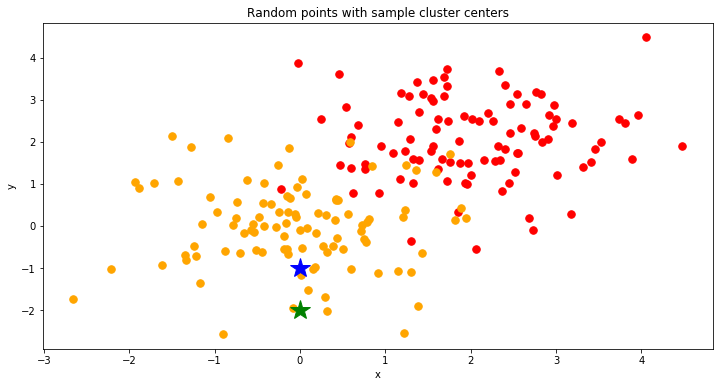

In [8]:
fig = plt.figure(figsize=(12,6))
pl.plot(array1[0], array1[1], ".", markersize=15, color='red')
pl.plot(array2[0], array2[1], ".", markersize=15, color='orange')
pl.plot(centers[0,0], centers[0,1], "*", markersize=20, color='b')
pl.plot(centers[1,0], centers[1,1], "*", markersize=20, color='green')
plt.title("Random points with sample cluster centers")
plt.xlabel('x')
plt.ylabel('y')

In [9]:
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

In [10]:
cl1 = distmetric(array1[0], array1[1], centers[0]) < \
      distmetric(array1[0], array1[1], centers[1])
cl2 = distmetric(array2[0], array2[1], centers[0]) < \
      distmetric(array2[0], array2[1], centers[1])
cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [11]:
newc = np.array(
    [np.hstack([array1[:, cl1], array2[:, cl2]]).mean(axis=1), 
        np.hstack([array1[:, ~cl1], array2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 1.01820775  1.14590972]
 [-0.03928507 -1.99301336]]


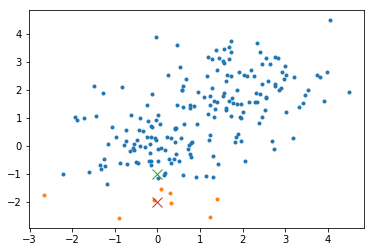

iteration  0


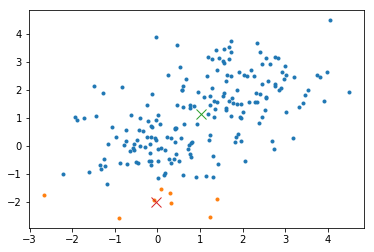

old center [[ 1.01820775  1.14590972]
 [-0.03928507 -1.99301336]] newcenter [[ 1.27933737  1.49636067]
 [-0.2767105  -0.94470534]]
iteration  1


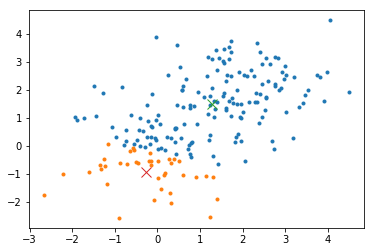

old center [[ 1.27933737  1.49636067]
 [-0.2767105  -0.94470534]] newcenter [[ 1.68576332  1.85291929]
 [-0.23276447 -0.39726041]]
iteration  2


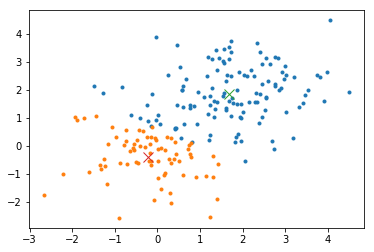

old center [[ 1.68576332  1.85291929]
 [-0.23276447 -0.39726041]] newcenter [[ 1.9468077   2.02549865]
 [-0.16384374 -0.15960102]]
iteration  3


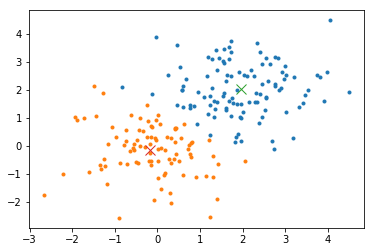

old center [[ 1.9468077   2.02549865]
 [-0.16384374 -0.15960102]] newcenter [[ 2.01028793  2.05453364]
 [-0.14467018 -0.10000978]]
iteration  4


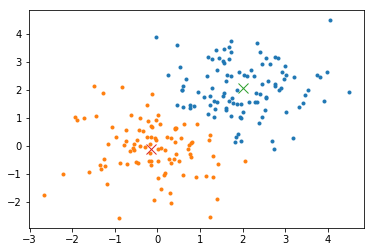

old center [[ 2.01028793  2.05453364]
 [-0.14467018 -0.10000978]] newcenter [[ 2.01028793  2.05453364]
 [-0.14467018 -0.10000978]]


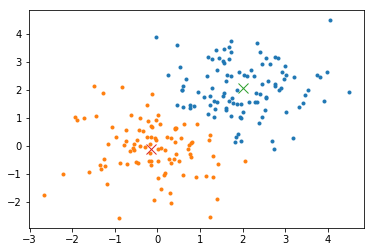

In [12]:
iterat = 0

fig, ax = plt.subplots()

l1, = ax.plot(np.hstack([array1[:,cl1], array2[:,cl2]])[0],
             np.hstack([array1[:,cl1], array2[:,cl2]])[1], '.')

l2, = ax.plot(np.hstack([array1[:,~cl1], array2[:,~cl2]])[0],
             np.hstack([array1[:,~cl1], array2[:,~cl2]])[1], '.')

l3, = ax.plot(centers[0,0], centers[0,1],'x', markersize=10)
l4, = ax.plot(centers[1,0], centers[1,1],'x', markersize=10)

display(fig)

while (not (centers == newc).all()) or iterat > 10:
    print("iteration ",iterat)
    centers = newc
    iterat += 1
    pl.cla()
    
    l1, = ax.plot(np.hstack([array1[:,cl1], array2[:,cl2]])[0],
             np.hstack([array1[:,cl1], array2[:,cl2]])[1], '.')

    l2, = ax.plot(np.hstack([array1[:,~cl1], array2[:,~cl2]])[0],
             np.hstack([array1[:,~cl1], array2[:,~cl2]])[1], '.')

    l3, = ax.plot(centers[0,0], centers[0,1],'x', markersize=10)
    l4, = ax.plot(centers[1,0], centers[1,1],'x', markersize=10)  
    
    cl1 = distmetric(array1[0], array1[1], centers[0]) < distmetric(array1[0], array1[1], centers[1])
    cl2 = distmetric(array2[0], array2[1], centers[0]) < distmetric(array2[0], array2[1], centers[1])

    display(fig)

    newc = np.array([np.hstack([array1[:, cl1], array2[:, cl2]]).mean(axis=1), 
                    np.hstack([array1[:, ~cl1], array2[:, ~cl2]]).mean(axis=1)])
    
    print ('old center', centers, 'newcenter', newc)    
    
pl.show()

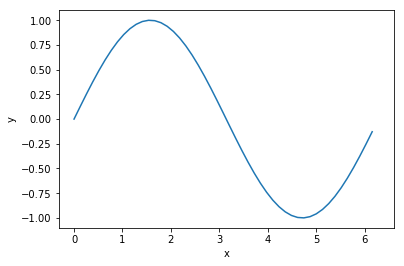

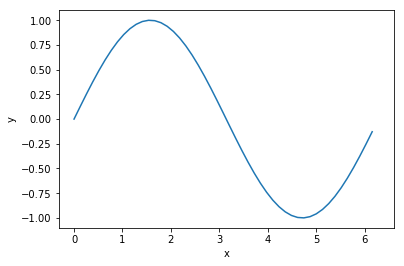

In [13]:
t = np.linspace(0, 2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0, 2 * np.pi], [-1, 1] )
ax.set_xlabel("x")
ax.set_ylabel("y")


for i in range(len(x)):
    l.set_data(t[:i], x[:i])
    #time.sleep(1) # too slow it down
    clear_output(wait=True)
    display(fig)
pl.show()